In [ ]:
! pip install -U qiskit
! pip install -U qiskit_ibm_runtime

! pip install qiskit
! pip install qiskit-ibm-runtime
! pip install qiskit[visualization]
! pip install qiskit_aer


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

# Step 1: Initialize a register with 2 qubits
qubits = QuantumRegister(2, name="q")

# Step 2: Create a quantum circuit with the initialized qubits
circuit = QuantumCircuit(qubits)

# Step 3: Perform operations on the qubits
q0, q1 = qubits
circuit.h(q0)      # Apply Hadamard gate to qubit 0
circuit.cx(q0, q1) # Apply CNOT gate with qubit 0 as control and qubit 1 as target
circuit.measure_all() # Measure all qubits

# Draw the circuit using Matplotlib
circuit.draw("mpl")


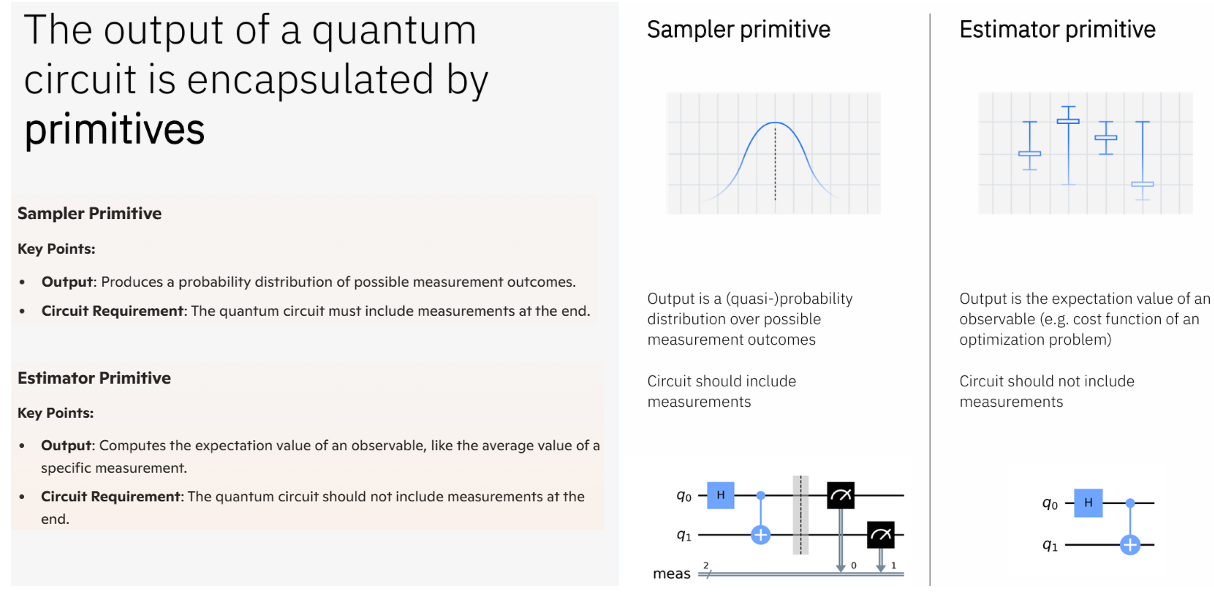

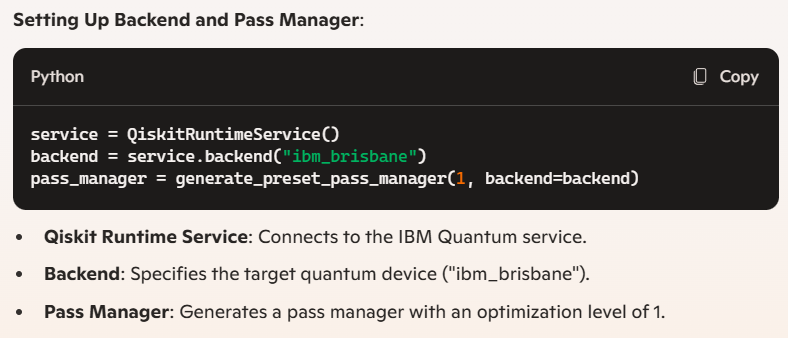

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

token="0269d7992397d34fa4514c08edc3e3dbb557a8616d1d3af782f6759c3472f7821942dce6da4b4162bf40a24506f16c21bc384a85fcb8b40e9faa185fed6a64ca"
# Save account credentials
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token)


qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
pass_manager = generate_preset_pass_manager(1, backend=backend)

transpiled = pass_manager.run(circuit)

transpiled.draw("mpl", idle_wires=False)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator

# Create a quantum register with 2 qubits
qubits = QuantumRegister(2, name="q")
# Create a quantum circuit with the initialized qubits
circuit = QuantumCircuit(qubits)
# Define the qubits
q0, q1 = qubits
# Apply a Hadamard gate to q0
circuit.h(q0)
# Apply a CNOT gate with q0 as control and q1 as target
circuit.cx(q0, q1)
# No measurements because we're using the Estimator primitive
observable = SparsePauliOp("ZZ")
# Initialize the Estimator
estimator = Estimator()

# Run the Estimator with the circuit and observable
job = estimator.run(circuit, observable)
job.result().values

In [ ]:
# Get the result and print the expectation value
exact_value = job.result().values[0]
print(exact_value)  # prints 1.0

In [ ]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import Estimator
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)

estimator = Estimator(backend_options=dict(noise_model=noise_model))

from qiskit_aer.noise import ReadoutError, depolarizing_error

noise_model = NoiseModel()
cx_depolarizing_prob = 0.02
bit_flip_prob = 0.05

noise_model.add_all_qubit_quantum_error(
    depolarizing_error(cx_depolarizing_prob, 2), ["cx"]
)

noise_model.add_all_qubit_readout_error(
    ReadoutError(
        [
            [1 - bit_flip_prob, bit_flip_prob],
            [bit_flip_prob, 1 - bit_flip_prob],
        ]
    )
)